# HarvardX_MITx_Person_Course_Dataset_EDA_Registered

In this notebook file, we do EDA(exploratory data analysis) on the cleaned dataset, to explore the patterns of retention in MOOC and to figure out what new variables we could create for further exploration.

## Loading and Accessing Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from scipy.stats import chisquare
from scipy.stats import ttest_ind 
from scipy.stats import binom_test

%matplotlib inline

In [2]:
# load data
df = pd.read_csv('data/hmx_cleaned.csv', parse_dates=['time_registered', 'last_event'])
df.head()

,course_id,user_id,viewed,explored,certified,country,education,YoB,gender,grade,time_registered,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987.0,m,0.0,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
1,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,1968.0,f,0.0,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
2,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,1989.0,m,0.0,2012-07-24,2013-07-27,6.0,3.0,0.0,0.0,0
3,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,1978.0,m,0.0,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0
4,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,0,0,United States,Secondary,1993.0,m,0.0,2012-07-24,2012-12-24,107.0,8.0,7.0,2.0,0


In [3]:
# size of the dataset
print('The dataset has {} records with {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 402750 records with 17 columns


In [4]:
# basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402750 entries, 0 to 402749
Data columns (total 17 columns):
course_id          402750 non-null object
user_id            402750 non-null object
viewed             402750 non-null int64
explored           402750 non-null int64
certified          402750 non-null int64
country            402750 non-null object
education          402750 non-null object
YoB                402750 non-null float64
gender             402750 non-null object
grade              402750 non-null float64
time_registered    402750 non-null datetime64[ns]
last_event         402750 non-null datetime64[ns]
nevents            402750 non-null float64
ndays_act          402750 non-null float64
nplay_video        402750 non-null float64
nchapters          402750 non-null float64
nforum_posts       402750 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(4), object(5)
memory usage: 52.2+ MB


In [5]:
# statistical description
df.describe().round(2)

,viewed,explored,certified,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts
count,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00,402750.00
mean,0.59,0.07,0.03,1985.25,0.04,343.83,4.61,38.21,2.29,0.02
std,0.49,0.26,0.18,8.82,0.16,1302.27,10.55,213.80,4.16,0.17
min,0.00,0.00,0.00,1931.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1982.00,0.00,1.00,1.00,0.00,0.00,0.00
50%,1.00,0.00,0.00,1988.00,0.00,9.00,1.00,0.00,1.00,0.00
75%,1.00,0.00,0.00,1991.00,0.00,100.00,3.00,5.00,3.00,0.00
max,1.00,1.00,1.00,2002.00,1.00,53180.00,205.00,34596.00,47.00,6.00


## Univariate EDA

First we do EDA on each variable.

###  course_id

In [6]:
# value counts of course_id
df.course_id.value_counts()

HarvardX/CS50x/2012            84402
MITx/6.00x/2012_Fall           52504
HarvardX/ER22x/2013_Spring     40444
MITx/6.00x/2013_Spring         36595
HarvardX/PH207x/2012_Fall      32337
HarvardX/PH278x/2013_Spring    26277
MITx/6.002x/2012_Fall          23738
MITx/14.73x/2013_Spring        20840
HarvardX/CB22x/2013_Spring     19860
MITx/8.02x/2013_Spring         16198
MITx/7.00x/2013_Spring         14287
MITx/6.002x/2013_Spring        11885
MITx/3.091x/2012_Fall          10112
MITx/8.MReV/2013_Summer         6193
MITx/2.01x/2013_Spring          3762
MITx/3.091x/2013_Spring         3316
Name: course_id, dtype: int64

In [7]:
# number of unique course_id
df.course_id.nunique()

16

In [8]:
# min count and  max count
df.course_id.value_counts().min(), df.course_id.value_counts().max()

(3316, 84402)

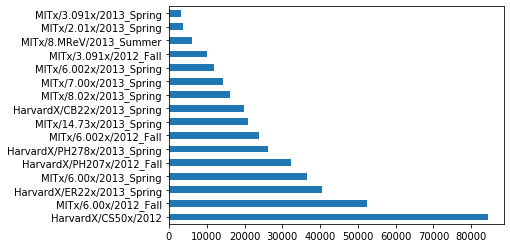

In [9]:
# bar plot of course_id
df.course_id.value_counts().sort_values(ascending=False).plot(kind='barh');

There are 16 courses in this dataset. This includes 3 courses offered twice. The number of enrolments varies a lot from course to course. The minimum enrolment is 3316, while the maximum is 84402.

Since course_id identifies institution (HarvardX or MITx), course name, and semester, we could extract information from course_id to get three new variables: institution, course_code and semester

In [10]:
# extract from course_id to create  institution, course_name and semester variables
df[['institution', 'course_code', 'semester']] = df.course_id.str.split('/', expand=True)
df.head()

,course_id,user_id,viewed,explored,certified,country,education,YoB,gender,grade,time_registered,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts,institution,course_code,semester
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987.0,m,0.0,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012
1,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,1968.0,f,0.0,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012
2,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,1989.0,m,0.0,2012-07-24,2013-07-27,6.0,3.0,0.0,0.0,0,HarvardX,PH207x,2012_Fall
3,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,1978.0,m,0.0,2012-07-24,2012-07-24,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012
4,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,0,0,United States,Secondary,1993.0,m,0.0,2012-07-24,2012-12-24,107.0,8.0,7.0,2.0,0,HarvardX,PH207x,2012_Fall


### user_id

In [11]:
# value count of user_id
df.groupby(['user_id']).course_id.count().sort_values(ascending=False).head(50)

user_id
MHxPC130308115    14
MHxPC130386513    14
MHxPC130478289    14
MHxPC130043781    14
MHxPC130165828    14
MHxPC130363989    13
MHxPC130464954    13
MHxPC130414295    13
MHxPC130595319    13
MHxPC130522464    13
MHxPC130520285    13
MHxPC130156822    13
MHxPC130003686    12
MHxPC130045546    12
MHxPC130581195    12
MHxPC130156377    12
MHxPC130154927    12
MHxPC130165743    11
MHxPC130203619    11
MHxPC130326200    11
MHxPC130263915    11
MHxPC130128348    11
MHxPC130109432    11
MHxPC130378625    10
MHxPC130587303    10
MHxPC130195840    10
MHxPC130050268    10
MHxPC130389521    10
MHxPC130068900    10
MHxPC130249556    10
MHxPC130551290    10
MHxPC130418555    10
MHxPC130435893    10
MHxPC130139599    10
MHxPC130314091    10
MHxPC130557130    10
MHxPC130161249    10
MHxPC130113599    10
MHxPC130143833    10
MHxPC130554854    10
MHxPC130498121     9
MHxPC130268839     9
MHxPC130411738     9
MHxPC130546123     9
MHxPC130358569     9
MHxPC130216327     9
MHxPC130559233     9
MHxPC

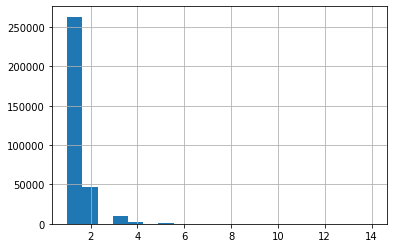

In [12]:
# histogram of courses taken by each user
df.groupby(['user_id']).course_id.count().sort_values(ascending=False).hist(bins=20);

Some learners enroled in more than 1 course. In later exploration we will figure out for those who has completed one course, are they more likely to complete other courses?

### viewed

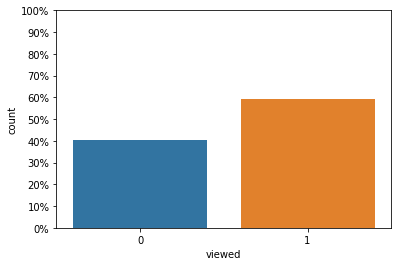

In [13]:
# bar chart of viewed 
sb.countplot(data=df, x='viewed')
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.0%}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

Around 60% of the registered viewed the courses

### explored

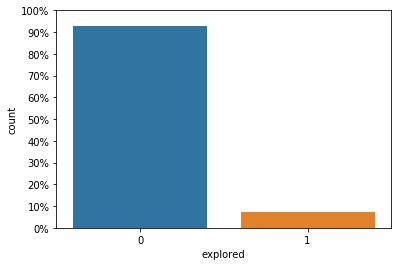

In [14]:
# bar chart of viewed 
sb.countplot(data=df, x='explored')
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.0%}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

Only less than 10% registered explored the course. 

### certified

In [15]:
# count of certified
certified_count = df[df.certified == 1].shape[0]

In [16]:
print('Among {} registered, only {} finnaly got certified, the overall certification rate is about {:.0%}'.format(df.shape[0], certified_count, (certified_count/ df.shape[0])))


Among 402750 registered, only 13673 finnaly got certified, the overall certification rate is about 3%


### country

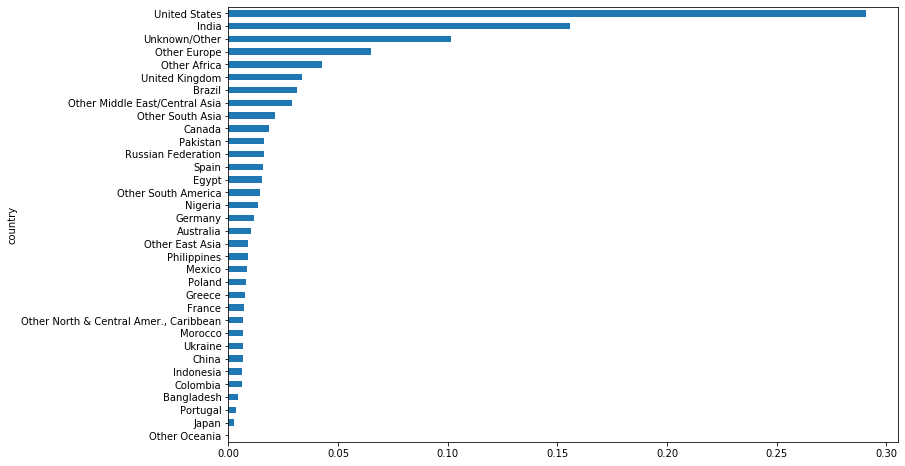

In [17]:
# country of registered
(df.groupby('country').user_id.count() / df.shape[0]) .sort_values().plot(figsize=(12, 8), kind='barh');


US has the largest number of registrants, around 30% registrants are from US. India has second largest number of registrants, the porportion is about 15%.

From country, we will create a new variable 'region', which contains two values: 'US' and 'NonUS'

In [18]:
# create a new column region with the value 'US' and 'NonUS'
df['region'] = df['country'].apply(lambda x: 'US' if x == 'United States' else 'NonUS')
df.head()

,course_id,user_id,viewed,explored,certified,country,education,YoB,gender,grade,...,last_event,nevents,ndays_act,nplay_video,nchapters,nforum_posts,institution,course_code,semester,region
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987.0,m,0.0,...,2012-07-24,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012,NonUS
1,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,1968.0,f,0.0,...,2012-07-24,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012,US
2,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,1989.0,m,0.0,...,2013-07-27,6.0,3.0,0.0,0.0,0,HarvardX,PH207x,2012_Fall,NonUS
3,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,1978.0,m,0.0,...,2012-07-24,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012,NonUS
4,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,0,0,United States,Secondary,1993.0,m,0.0,...,2012-12-24,107.0,8.0,7.0,2.0,0,HarvardX,PH207x,2012_Fall,US


### education

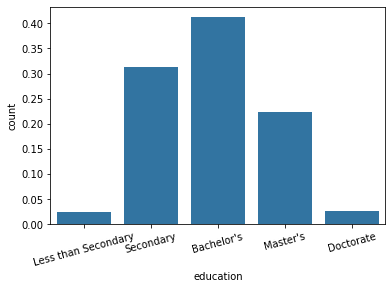

In [19]:
# Level of educatoin
n_records = df.shape[0]
max_value = df.education.value_counts().max()
max_prop = max_value / n_records
tick_props = np.arange(0, max_prop+0.01, 0.05)
tick_names = ['{:.2f}'.format(x) for x in tick_props]

base_color = sb.color_palette()[0]
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.countplot(data=df, x='education', color=base_color, order=order)
plt.xticks(rotation=15)
plt.yticks(tick_props*n_records, tick_names);

As much as 40% students hold a Bachelor's Degree, while around 20% hold a Master's, 3% hold a Doctorate Degree. That is to say, the mojority of the students have an education level of Bachelor's or higher. We are educating the well educated in MOOC.

### YoB: Age

In order to get a insight of the students' age, it is better to convert the year of birth to age. First we will extract the year of registration from time_registered variable. Then we will substract the year of birth to get the age of the learner.

In [20]:
# create age variable
df['age'] = df.time_registered.apply(lambda x: x.year) - df['YoB']
df.head(1)

,course_id,user_id,viewed,explored,certified,country,education,YoB,gender,grade,...,nevents,ndays_act,nplay_video,nchapters,nforum_posts,institution,course_code,semester,region,age
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,1987.0,m,0.0,...,0.0,0.0,0.0,0.0,0,HarvardX,CS50x,2012,NonUS,25.0


In [21]:
# statistical description
df['age'].describe().round(2)

count    402750.00
mean         27.28
std           8.83
min          10.00
25%          21.00
50%          25.00
75%          30.00
max          82.00
Name: age, dtype: float64

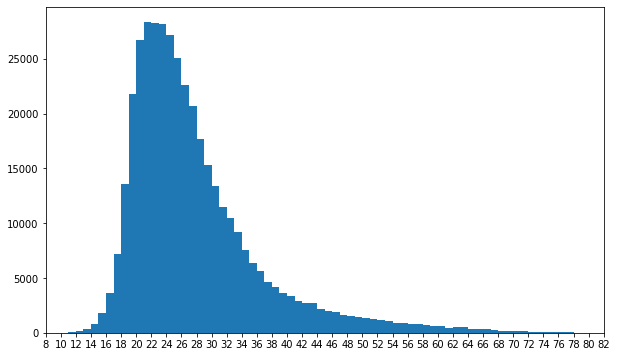

In [22]:
# distribution of age
plt.figure(figsize=(10,6))
max_age = df.age.max()
min_age = df.age.min()

bins = np.arange(0, max_age+1, 1)
ticks = np.arange(8, max_age+1, 2)
plt.hist(data=df, x='age', bins=bins)
plt.xticks(ticks)
plt.xlim(8, 82);

The age of the learners varies from 10 years old to 82 years old. Most learners are in their 20s and 30s. The peak of the distribution appears at around 20 years old, and there is a long tail for more than 50 years old.

In [23]:
# sine we have create the age variable, we will drop the YoB variable
df = df.drop('YoB', axis=1)

### gender

In [24]:
# value counts of gender
df.gender.value_counts()

m    298463
f    104287
Name: gender, dtype: int64

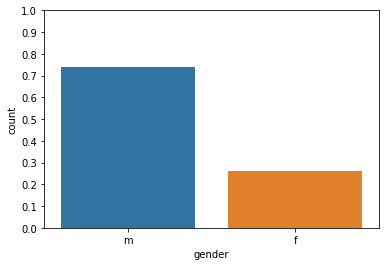

In [25]:
# bar chart of gender
sb.countplot(data=df, x='gender')
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

About 75% of the students are male and only about 25% are female.

### grade

'grade' is a continuous variable ranges from 0 to 1, we will plot a histogram to check the distribution of this variable.

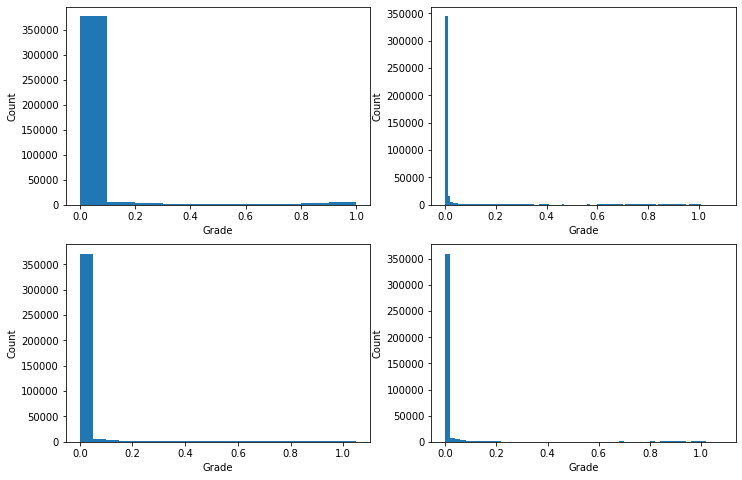

In [26]:
# distribution of grade in difference bin size
plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
bins = np.arange(0, 1+0.1, 0.1)
plt.hist(data=df, x='grade', bins=bins)
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
bins = np.arange(0, 1+0.1, 0.01)
plt.hist(data=df, x='grade', bins=bins)
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
bins = np.arange(0, 1+0.1, 0.05)
plt.hist(data=df, x='grade', bins=bins)
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
bins = np.arange(0, 1+0.1, 0.02)
plt.hist(data=df, x='grade', bins=bins)
plt.xlabel('Grade')
plt.ylabel('Count');


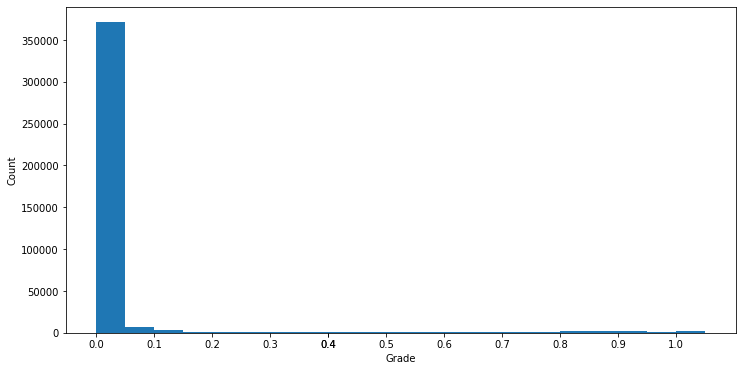

In [27]:
# distribution of grade in bin size 0.05
plt.figure(figsize=(12, 6))
ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins = np.arange(0, 1+0.1, 0.05)
plt.hist(data=df, x='grade', bins=bins)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(ticks);

The distribution is heavily right skewed, we will apply a square root transform to see how the plots look.

In [28]:
# create a new columns with the grade values transformed in square root
df['grade_sqrt'] = np.sqrt(df['grade'])
df.head()

,course_id,user_id,viewed,explored,certified,country,education,gender,grade,time_registered,...,ndays_act,nplay_video,nchapters,nforum_posts,institution,course_code,semester,region,age,grade_sqrt
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,m,0.0,2012-07-24,...,0.0,0.0,0.0,0,HarvardX,CS50x,2012,NonUS,25.0,0.0
1,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,f,0.0,2012-07-24,...,0.0,0.0,0.0,0,HarvardX,CS50x,2012,US,44.0,0.0
2,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,m,0.0,2012-07-24,...,3.0,0.0,0.0,0,HarvardX,PH207x,2012_Fall,NonUS,23.0,0.0
3,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,m,0.0,2012-07-24,...,0.0,0.0,0.0,0,HarvardX,CS50x,2012,NonUS,34.0,0.0
4,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,0,0,United States,Secondary,m,0.0,2012-07-24,...,8.0,7.0,2.0,0,HarvardX,PH207x,2012_Fall,US,19.0,0.0


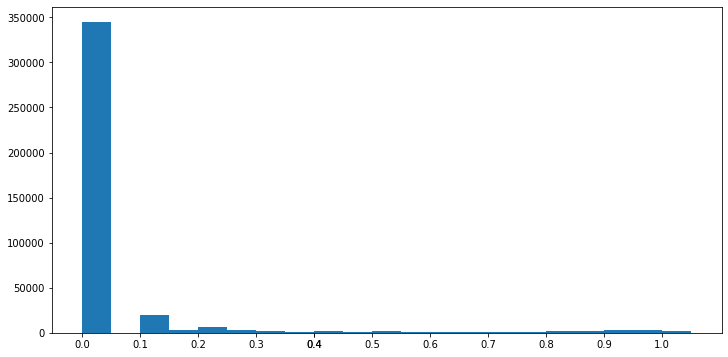

In [29]:
# distribution of grade, square root transformed
plt.figure(figsize=(12, 6))
ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins = np.arange(0, 1+0.1, 0.05)
plt.hist(data=df, x='grade_sqrt', bins=bins)
plt.xticks(ticks);

In [30]:
# create a new columns with the grade values transformed in cube root
df['grade_cbrt'] = np.cbrt(df['grade'])
df.head()

,course_id,user_id,viewed,explored,certified,country,education,gender,grade,time_registered,...,nplay_video,nchapters,nforum_posts,institution,course_code,semester,region,age,grade_sqrt,grade_cbrt
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,m,0.0,2012-07-24,...,0.0,0.0,0,HarvardX,CS50x,2012,NonUS,25.0,0.0,0.0
1,HarvardX/CS50x/2012,MHxPC130407931,0,0,0,United States,Secondary,f,0.0,2012-07-24,...,0.0,0.0,0,HarvardX,CS50x,2012,US,44.0,0.0,0.0
2,HarvardX/PH207x/2012_Fall,MHxPC130313697,0,0,0,India,Bachelor's,m,0.0,2012-07-24,...,0.0,0.0,0,HarvardX,PH207x,2012_Fall,NonUS,23.0,0.0,0.0
3,HarvardX/CS50x/2012,MHxPC130064950,0,0,0,Unknown/Other,Master's,m,0.0,2012-07-24,...,0.0,0.0,0,HarvardX,CS50x,2012,NonUS,34.0,0.0,0.0
4,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,0,0,United States,Secondary,m,0.0,2012-07-24,...,7.0,2.0,0,HarvardX,PH207x,2012_Fall,US,19.0,0.0,0.0


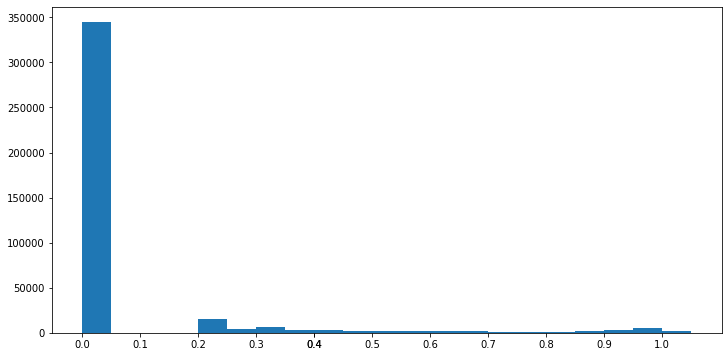

In [31]:
#distribution of grade, cube root transformed
plt.figure(figsize=(12, 6))
ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins = np.arange(0, 1+0.1, 0.05)
plt.xticks(ticks)
plt.hist(data=df, x='grade_cbrt', bins=bins);

A cube root transformation does not make too much differece, either. This could be because there are way too many students with the grade value 0.

In [32]:
# proportion of learners with a grade of 0
grade0_prop = df[df.grade==0].shape[0] / df.shape[0]

print('{:.0%} learnrs got a grade of 0'.format(grade0_prop))

86% learnrs got a grade of 0


### time_registered

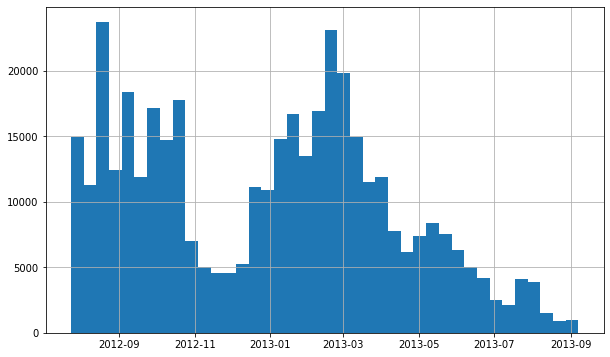

In [33]:
# distribution of time registered
df.time_registered.hist(figsize=(10, 6), bins=40);

There are two peaks for time of registration. One around 2012-08, another around 2013-02.

Students can enrol before or after the course lauching.   

We also want to know the distribution of the course launch time as well as the course wrap time. 

Both the course launch time and course wrap time are available in Table 1 from year 1 report. 

We will create two variables course_lauch and course_wrap accordingly.

In [34]:
# create two variables course_lauch and course_wrap

launch_dict = {'HarvardX/CS50x/2012': '2012-10-15', 'HarvardX/PH207x/2012_Fall': '2012-10-15',
       'HarvardX/ER22x/2013_Spring': '2013-03-02', 'HarvardX/PH278x/2013_Spring': '2013-05-15',
       'HarvardX/CB22x/2013_Spring': '2013-03-13', 'MITx/14.73x/2013_Spring': '2013-02-12',
       'MITx/6.00x/2012_Fall': '2012-09-26', 'MITx/6.002x/2012_Fall': '2012-09-05',
       'MITx/8.02x/2013_Spring': '2013-02-18', 'MITx/6.00x/2013_Spring': '2013-02-04',
       'MITx/7.00x/2013_Spring': '2013-03-05', 'MITx/8.MReV/2013_Summer': '2013-06-01',
       'MITx/3.091x/2012_Fall': '2012-10-09', 'MITx/6.002x/2013_Spring': '2013-03-03',
       'MITx/2.01x/2013_Spring': '2013-04-15', 'MITx/3.091x/2013_Spring': '2013-02-05'}

wrap_dict = {'HarvardX/CS50x/2012': '2013-04-15', 'HarvardX/PH207x/2012_Fall': '2013-01-30',
       'HarvardX/ER22x/2013_Spring': '2013-07-26', 'HarvardX/PH278x/2013_Spring': '2013-07-25',
       'HarvardX/CB22x/2013_Spring': '2013-08-26', 'MITx/14.73x/2013_Spring': '2013-05-21',
       'MITx/6.00x/2012_Fall': '2013-01-15', 'MITx/6.002x/2012_Fall': '2012-12-25',
       'MITx/8.02x/2013_Spring': '2013-06-18', 'MITx/6.00x/2013_Spring': '2013-06-04',
       'MITx/7.00x/2013_Spring': '2013-06-06', 'MITx/8.MReV/2013_Summer': '2013-09-15',
       'MITx/3.091x/2012_Fall': '2013-01-15', 'MITx/6.002x/2013_Spring': '2013-07-01',
       'MITx/2.01x/2013_Spring': '2013-07-30', 'MITx/3.091x/2013_Spring': '2013-06-21'}


df['course_launch'] = df.course_id.map(launch_dict)
df['course_wrap'] = df.course_id.map(wrap_dict)

df['course_launch'] = pd.to_datetime(df['course_launch'])

df['course_wrap'] = pd.to_datetime(df['course_wrap'])


From the course launch time and wrap time, we could get the duration of the course.

In [35]:
# duration of the course
df['course_duration'] = (df['course_wrap'] - df['course_launch']).dt.days

Some learners registered before the course launch date, while some learner registered after the course launch date. Will the duration between registration date and course launch date affect the certification? We will create a variable registered_launch_delta. If one registered after the course launch, the value is positive; If one registered before the course launch, the value will be negative.

In [36]:
# create the variable registered_launch_delta
df['registered_launch_delta'] = (df['time_registered'] - df['course_launch']).dt.days
df.head(1)

,course_id,user_id,viewed,explored,certified,country,education,gender,grade,time_registered,...,course_code,semester,region,age,grade_sqrt,grade_cbrt,course_launch,course_wrap,course_duration,registered_launch_delta
0,HarvardX/CS50x/2012,MHxPC130422039,0,0,0,Unknown/Other,Secondary,m,0.0,2012-07-24,...,CS50x,2012,NonUS,25.0,0.0,0.0,2012-10-15,2013-04-15,182,-83


### last_event


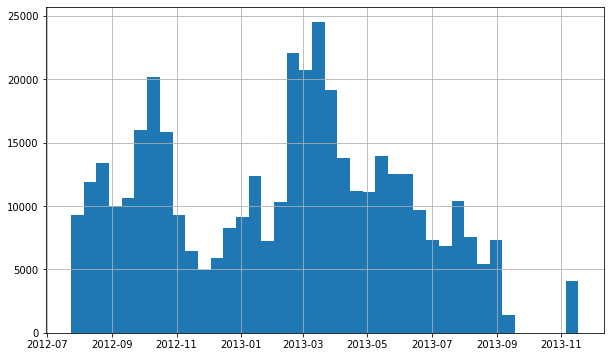

In [37]:
# distribution of last event
df.last_event.hist(figsize=(10, 6), bins=40);

There are also two peaks in the distribution of last event. One around 2012-10, another around 2013-03

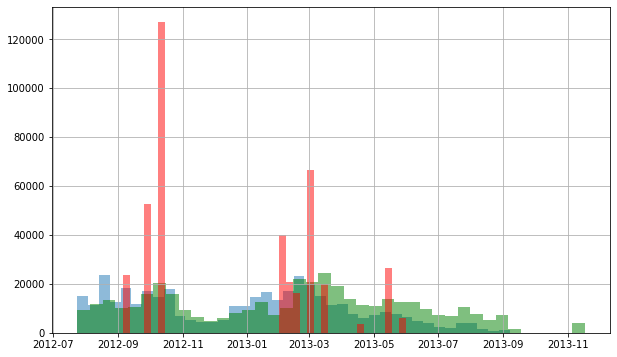

In [38]:
# distribution of time registered VS last event VS course launch
df.time_registered.hist(figsize=(10, 6), bins=40,alpha=0.5)
df.last_event.hist(figsize=(10, 6), bins=40, color='green', alpha = 0.5)
df.course_launch.hist(figsize=(10, 6), bins=40, color='red', alpha=0.5);

Calculating from the last_event and course launch time, we can get the lifetime of a learner

In [39]:
# create lifetime variable
df['lifetime'] = (df['last_event'] - df['course_launch']).dt.days

### nevents, ndays_act, nplay_video, nchapters, nforum_posts: activities

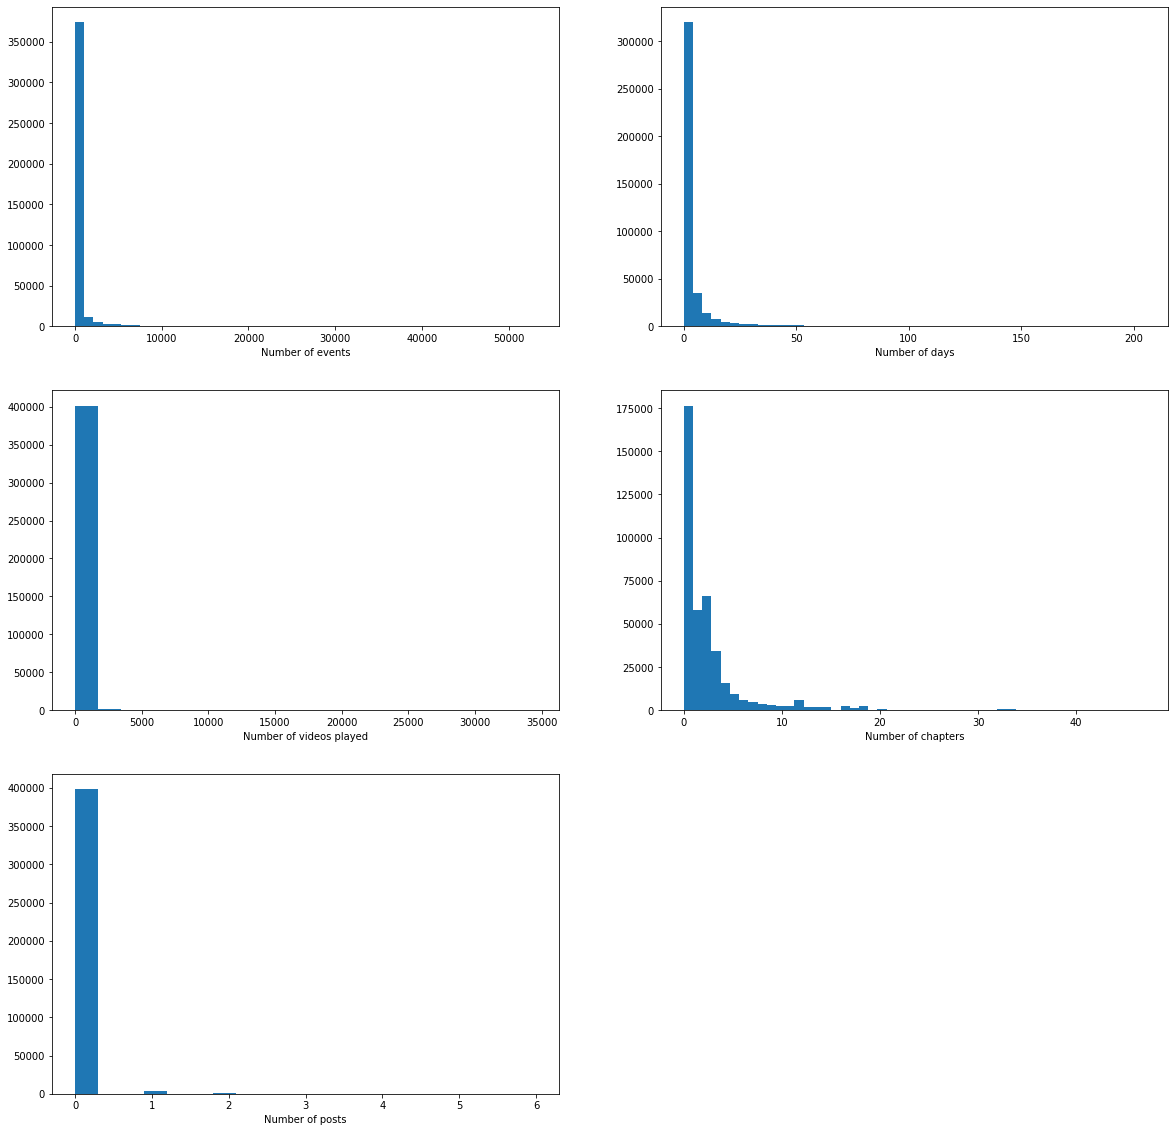

In [40]:
# distribution of nevents, ndays_act, nplay_video, nchapters, nforum_posts
plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)
plt.hist(data=df, x='nevents', bins=50)
plt.xlabel('Number of events')

plt.subplot(3, 2, 2)
plt.hist(data=df, x='ndays_act', bins=50)
plt.xlabel('Number of days')

plt.subplot(3, 2, 3)
plt.hist(data=df, x='nplay_video', bins=20)
plt.xlabel('Number of videos played')

plt.subplot(3, 2, 4)
plt.hist(data=df, x='nchapters', bins=50)
plt.xlabel('Number of chapters')

plt.subplot(3, 2, 5)
plt.hist(data=df, x='nforum_posts', bins=20)
plt.xlabel('Number of posts');

The distribution of nevents, ndays_act, nplay_video, nchapters, nforum_posts are all right skewed

### institution

In [41]:
# value counts
df.institution.value_counts()

HarvardX    203320
MITx        199430
Name: institution, dtype: int64

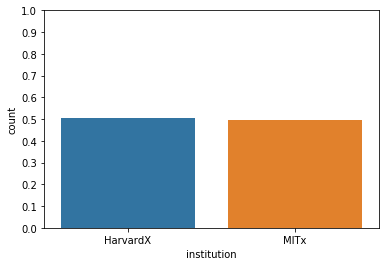

In [42]:
# barchart
sb.countplot(data=df, x='institution')
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

Records from each institutions are about the same.

### course_code

In [43]:
# value count

df.course_code.value_counts()

6.00x     89099
CS50x     84402
ER22x     40444
6.002x    35623
PH207x    32337
PH278x    26277
14.73x    20840
CB22x     19860
8.02x     16198
7.00x     14287
3.091x    13428
8.MReV     6193
2.01x      3762
Name: course_code, dtype: int64

In [44]:
# number of courses offered more than once
df.course_id.nunique() - df.course_code.nunique()

3

From the course code, we can create a new variable course subject.

In [45]:
# course subject dict
course_subject_dict = {'CS50x': 'OTHERS', 'PH207x': 'OTHERS', 'ER22x': 'OTHERS', 'PH278x': 'OTHERS',
                       'CB22x': 'OTHERS', '14.73x': 'OTHERS', '6.002x': 'STEM', '6.00x': 'STEM', 
                       '8.02x': 'STEM', '8.MReV': 'STEM', '7.00x': 'STEM', '3.091x': 'STEM', '2.01x': 'OTHERS'}
df['course_subject'] = df['course_code'].map(course_subject_dict)
df.course_subject.value_counts()

OTHERS    227922
STEM      174828
Name: course_subject, dtype: int64

### semester

In [46]:
# value counts
df.semester.value_counts()

2013_Spring    193464
2012_Fall      118691
2012            84402
2013_Summer      6193
Name: semester, dtype: int64

For consistency, we will change the semester of'2012' to '2012_Fall' since we know the course launch in Edx starting in 2012 fall.

In [47]:
# change '2012' to '2012_Fall'
df['semester'] = df.semester.replace('2012', '2012_Fall')
df.semester.value_counts()

2012_Fall      203093
2013_Spring    193464
2013_Summer      6193
Name: semester, dtype: int64

The numbers of registrants in semester 2012_Fall and 2013_Spring are very close. While the number of semester 2013_Summer is pretty small since there is only one course included in semester 2013_Summer.

### course launch

In [48]:
# launch date of each course
course_launch_df = df[['course_id', 'course_launch']].drop_duplicates()
course_launch_df 

,course_id,course_launch
0,HarvardX/CS50x/2012,2012-10-15
2,HarvardX/PH207x/2012_Fall,2012-10-15
28,HarvardX/ER22x/2013_Spring,2013-03-02
59,HarvardX/PH278x/2013_Spring,2013-05-15
70,HarvardX/CB22x/2013_Spring,2013-03-13
203320,MITx/14.73x/2013_Spring,2013-02-12
203321,MITx/6.00x/2012_Fall,2012-09-26
203322,MITx/6.002x/2012_Fall,2012-09-05
203327,MITx/8.02x/2013_Spring,2013-02-18
203330,MITx/6.00x/2013_Spring,2013-02-04


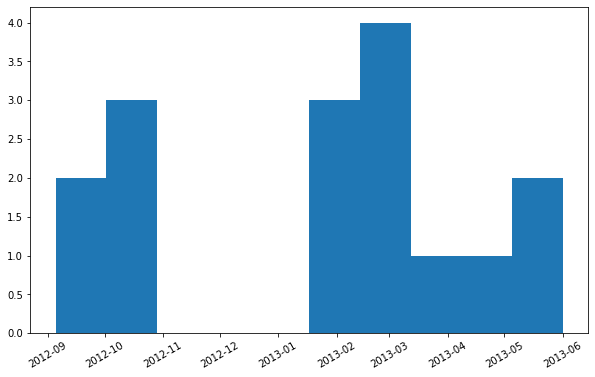

In [49]:
# distribution
course_launch_df['course_launch'].hist(grid=False, figsize=(10, 6), bins=10)
plt.xticks(rotation=30);

### course_wrap

In [50]:
# course wrap date
course_wrap_df = df[['course_id', 'course_wrap']].drop_duplicates()
course_wrap_df 

,course_id,course_wrap
0,HarvardX/CS50x/2012,2013-04-15
2,HarvardX/PH207x/2012_Fall,2013-01-30
28,HarvardX/ER22x/2013_Spring,2013-07-26
59,HarvardX/PH278x/2013_Spring,2013-07-25
70,HarvardX/CB22x/2013_Spring,2013-08-26
203320,MITx/14.73x/2013_Spring,2013-05-21
203321,MITx/6.00x/2012_Fall,2013-01-15
203322,MITx/6.002x/2012_Fall,2012-12-25
203327,MITx/8.02x/2013_Spring,2013-06-18
203330,MITx/6.00x/2013_Spring,2013-06-04


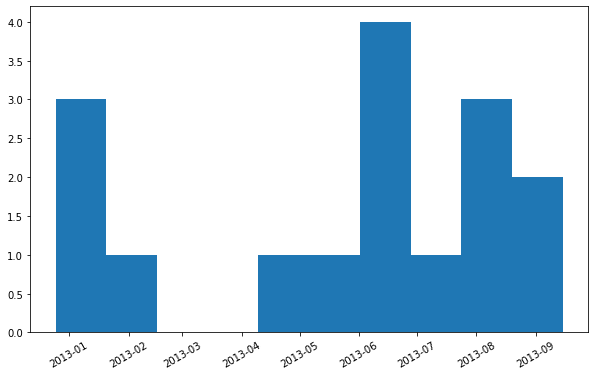

In [51]:
# distribution
course_wrap_df ['course_wrap'].hist(grid=False, figsize=(10, 6), bins=10)
plt.xticks(rotation=30);

### course_duration

In [52]:
# course duration
course_duration_df = df[['course_id', 'course_duration']].drop_duplicates().sort_values('course_duration')
course_duration_df

,course_id,course_duration
59,HarvardX/PH278x/2013_Spring,71
203341,MITx/7.00x/2013_Spring,93
203320,MITx/14.73x/2013_Spring,98
203349,MITx/3.091x/2012_Fall,98
203345,MITx/8.MReV/2013_Summer,106
203398,MITx/2.01x/2013_Spring,106
2,HarvardX/PH207x/2012_Fall,107
203321,MITx/6.00x/2012_Fall,111
203322,MITx/6.002x/2012_Fall,111
203327,MITx/8.02x/2013_Spring,120


In [53]:
# statistical description
course_duration_df.describe()

,course_duration
count,16.000000
mean,118.187500
std,27.881221
min,71.000000
25%,104.000000
50%,111.000000
75%,124.000000
max,182.000000


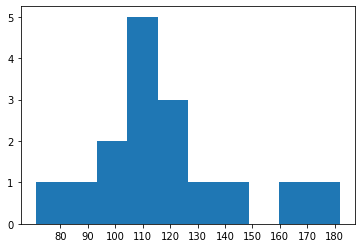

In [54]:
# histogram of course duration
plt.hist(data=course_duration_df, x='course_duration', bins=10)
plt.xticks([80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]);

75% courses have a duration more than 105 days, which is 15 weeks. While a typical semester in US universities is also 15 weeks. Most of the early courses offered on Edx were longer than typical on campus courses. However, 4-8 week courses are pretty common in nowadays.

### registered_launch_delta

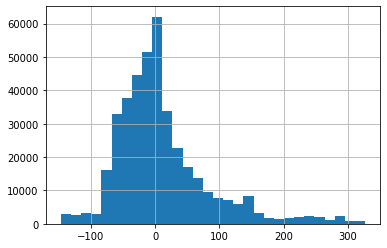

In [55]:
# histogram of registered_launch_delta
df['registered_launch_delta'].hist(bins=30);

The distribution is normal distribution, the peak appears around 0.

Most learners registered near the course launch, some learners registered more than 3 months before the course launch, while some registered 10 months after the course launch.

### lifetime

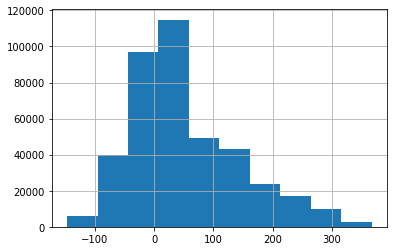

In [56]:
# histogram of lifetime
df.lifetime.hist();

Since in the data wrangling process, for the missing values in last_event variable, we filled NA with the registration time. If  the registration time is earlier than course launch time, lifetime value is negtive. We need to convert all the negtive values to 0.

In [57]:
# convert negtive lifetime to 0
df['lifetime'] = df.lifetime.apply(lambda x: 0 if x < 0 else x)

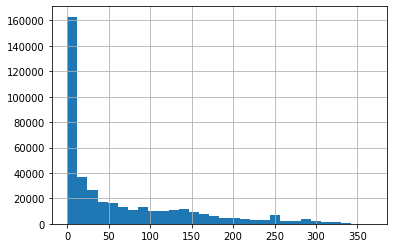

In [58]:
#  histogram of lifetime
df.lifetime.hist(bins=30);

In [59]:
# statistical description
df.lifetime.describe()

count    402750.000000
mean         62.621462
std          79.481610
min           0.000000
25%           0.000000
50%          25.000000
75%         104.000000
max         367.000000
Name: lifetime, dtype: float64

The distribution of lifetime is right skewed. Many learners have a lifetime of 0. The max of lifetime is 367 which is bigger than the max of course duration 182. Seems like that after the course wrap up, there were still some learners interacting with the course content. 

Since the course duration varies, it would make more sense to look at the proportion of lifetime in duration rather than the number of lifetime. We will create this lifetime_proportion variable and drop the lifetime variable.

In [60]:
# create lifetime_proportion and proportion>10% variables
df['lifetime_proportion'] = df['lifetime']*100 / df['course_duration']
df = df.drop('lifetime', axis=1)

### lifetime_proportion

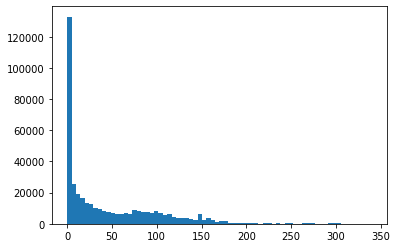

In [61]:
# histogram of lifetime_proportion
df['lifetime_proportion'].hist(bins=70, grid=False);

The distribution is heavily right skewed, many learners have a lifetime_proportion of 0

### region

In [62]:
# value counts

df.region.value_counts()

NonUS    285647
US       117103
Name: region, dtype: int64

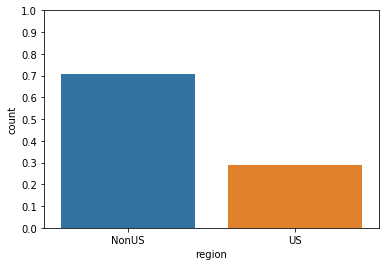

In [63]:
# barchart
sb.countplot(data=df, x='region')
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

About one third of the students come from US, others come from overseas.

### course subject

In [64]:
# course subject of each course
course_subject_df = df[['course_id', 'course_subject']].drop_duplicates().reset_index(drop=True)
course_subject_df

,course_id,course_subject
0,HarvardX/CS50x/2012,OTHERS
1,HarvardX/PH207x/2012_Fall,OTHERS
2,HarvardX/ER22x/2013_Spring,OTHERS
3,HarvardX/PH278x/2013_Spring,OTHERS
4,HarvardX/CB22x/2013_Spring,OTHERS
5,MITx/14.73x/2013_Spring,OTHERS
6,MITx/6.00x/2012_Fall,STEM
7,MITx/6.002x/2012_Fall,STEM
8,MITx/8.02x/2013_Spring,STEM
9,MITx/6.00x/2013_Spring,STEM


In [65]:
# course subject value counts
course_subject_df.course_subject.value_counts()

STEM      9
OTHERS    7
Name: course_subject, dtype: int64

Among the 16 courses, 9 of them are categorized as STEM courses, the other 7 are OTHERS courses.

### Discussion

**The new variables we created above including:**

- institution: identifies which institution the course is offered by. HarvardX or MITx. This was extracted from the course_id variable
- course_code: The short name of the course. This is also extracted from the course_id variable
- semester: The semester the course was offered. Extracted from the course_id variable
- year_registered: The year the learned registered the course, extracted from time_registered variable.
- region: Which region the learner comes from, value 'US' and 'NonUS'
- age: The age of the learner. Calculated from year_registered variable and YoB variable.
- grade_sqrt: Sqaure Root transformed grade
- grade_curt: Cubic root transformed grade
- course_launch: The course launch date. This information was get from table 1 in HarvardX and MITx year 1 report.
- course_wrap: The course wrap date. This information was get from table 1 in HarvardX and MITx year 1 report.
- course_duration: The duration of the course. Calculated from course_launch and course_wrap
- registered_launch_delta: Identifies the duration between registration date and course launch date
- lifetime: The lifetime of a learner to a specific course. Calculated from course_launch and last_event
- lifetime_proportion:  the proportion of learner's lifetime in the course duration. Calculated from lifetime variable and course_duration variable
- course_subject: The subject of the course, value 'STEM' and 'OTHERS'

**Our findings are:**

- course_id: There are 16 courses in this dataset. This includes 3 courses offered twice. The number of enrolments varies a lot from course to course. The minimum enrolment is 3316, while the maximum is 84402.
- user_id: Some learners enroled in more than 1 course. In later exploration we will figure out for those who has completed one course, are they more likely to complete a subsequent courses?
- viewed: Around 60% of the learners viewed the courses.
- explored: Only less than 10% learners explored.
- certified: Among 402750 registered, only 13673 finnaly got certified, the overall certification rate is about 3.39%
- country: US has the largest number of registrants, around 30% registrants are from US. India has second largest number of registrants, the porportion is about 15%.
- education level: As much as 40% students hold a Bachelor's Degree, while around 20% hold a Master's, 3% hold a Doctorate Degree. That is to say, the mojority of the students have an education level of Bachelor's or higher. We are educating the well educated in MOOC.
- age: The age of the learners varies from 10 years old to 82 years old. Most learners are in their 20s and 30s. The peak of the distribution appears at around 20 years old, and there is a long tail for more than 50 years old.
- gender: about 75% students are male, almost 3 times the number of female.
- grade: the grade variable is seriously right skewed, even after we applied square root transformation and cute root transformation. 86% learnrs got a grade of 0. Most of the learners did not intend to complete the course.
- time_registered: There are two peaks for time of registration. One around 2012-08, another around 2013-02.
- last_event: There are also two peaks in the distribution of last event. One around 2012-10, another around 2013-03
- activity variables: The distribution of nevents, ndays_act, nplay_video, nchapters, nforum_posts are all right skewed.
- institution: Records from each institutions are about the same
- course_code: There are 3 courses offered more than once
- semester: The numbers of registrants in semester 2012_Fall and 2013_Spring are very close. While the number of semester 2013_Summer is pretty small since there is only one course included in semester 2013_Summer.
- course_duration: 75% courses have a duration more than 105 days, which is 15 weeks.
- registered_launch_delta: The distribution is normal distribution, the peak appears around 0.Most learners registered near the course launch, some learners registered more than 3 months before the course launch, while some registered 10 months after the course launch.
- lifetime: The distribution of lifetime is right skewed. Many learners have a lifetime of 0. The max of lifetime is 367 which is bigger than the max of course duration 182.
- lifetime proportion: The distribution is heavily right skewed, many learners have a lifetime_proportion of 0
- region: About one third of the students come from US, others come from overseas.
- course_subject: Among the 16 courses, 9 of them are categorized as STEM courses, the other 7 are OTHERS courses.

## Bivariate EDA

In this part, we will conduct exploratory analysis on 2 variables. The features of interest in this project are certified and grade. We will try to find out the relationship between other features and these 2 features.

### certification rate by course_id

In [66]:
# certification rate by course
certification_rate_course = 100*(df[df.certified==1].groupby('course_id').certified.count()) / df.groupby('course_id').certified.count()
certification_rate_course.round(2)


course_id
HarvardX/CB22x/2013_Spring     1.62
HarvardX/CS50x/2012            1.26
HarvardX/ER22x/2013_Spring     4.87
HarvardX/PH207x/2012_Fall      5.36
HarvardX/PH278x/2013_Spring    2.41
MITx/14.73x/2013_Spring        9.04
MITx/2.01x/2013_Spring         4.33
MITx/3.091x/2012_Fall          4.48
MITx/3.091x/2013_Spring        3.20
MITx/6.002x/2012_Fall          4.89
MITx/6.002x/2013_Spring        3.95
MITx/6.00x/2012_Fall           3.06
MITx/6.00x/2013_Spring         2.61
MITx/7.00x/2013_Spring         3.77
MITx/8.02x/2013_Spring         2.56
MITx/8.MReV/2013_Summer        3.33
Name: certified, dtype: float64

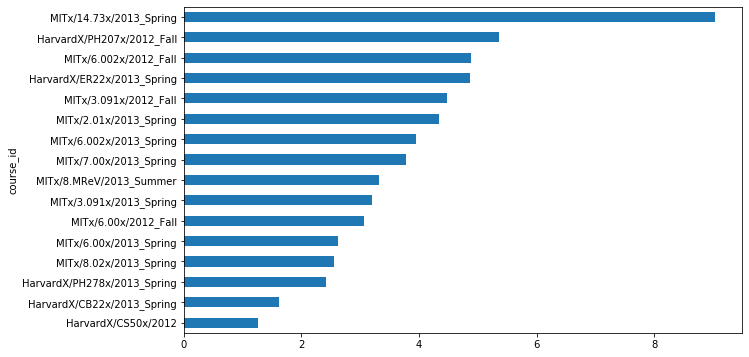

In [67]:
# bar chart of certification rate
certification_rate_course.sort_values(ascending=True).plot(figsize=(10, 6), kind='barh');

In [68]:
# statistical description of certification rate
certification_rate_course.describe().round(2)

count    16.00
mean      3.80
std       1.83
min       1.26
25%       2.60
50%       3.55
75%       4.58
max       9.04
Name: certified, dtype: float64

For the 16 courses, the certification rate ranges from 1.25% to 9.04%, with a mean of 3.80% and a medium of 3.55%.

### user_id VS certified

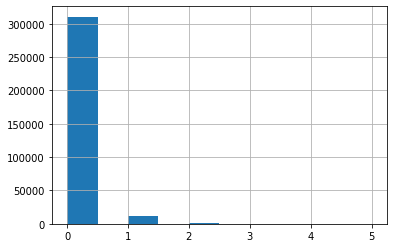

In [69]:
# histogram of number of courses certified by user
user_certified_df = df.groupby('user_id').certified.sum().reset_index()
user_certified_df.columns = ['user_id', 'ncourse_certified']
user_certified_df.ncourse_certified.hist();

In [70]:
# statistical description
user_certified_df.ncourse_certified.describe().round(2)

count    323419.00
mean          0.04
std           0.22
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           5.00
Name: ncourse_certified, dtype: float64

In [71]:
# proportion of number of course certified
user_certified_df.ncourse_certified.value_counts() / user_certified_df.shape[0]

0    0.960472
1    0.037144
2    0.002084
3    0.000254
4    0.000028
5    0.000019
Name: ncourse_certified, dtype: float64

Most learners were not certified for any course. While there were also some learners certified for as many as 5 courses.

### certification rate of viewed

In [72]:
# value counts of certified among viewed
df[df.viewed == 1].certified.value_counts()

0    225818
1     13673
Name: certified, dtype: int64

In [73]:
# certification rate of viewed
100*df[df.viewed == 1].certified.value_counts()[1] / df[df.viewed == 1].shape[0]

5.709191577136511

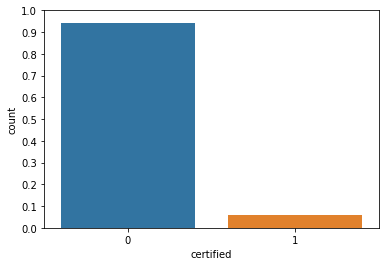

In [74]:
# bar chart
sb.countplot(data=df[df.viewed == 1], x='certified')
n_records = df[df.viewed == 1].shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

The certification rate of viewed is about 6%. This is higher than the overall certification rate, but this is still very low.

### certification rate of explored

In [75]:
# value counts of certified among viewed
df[df.explored == 1].certified.value_counts()

0    15513
1    13073
Name: certified, dtype: int64

In [76]:
# certification rate of viewed
100*df[df.explored == 1].certified.value_counts()[1] / df[df.explored == 1].shape[0]

45.73217658993913

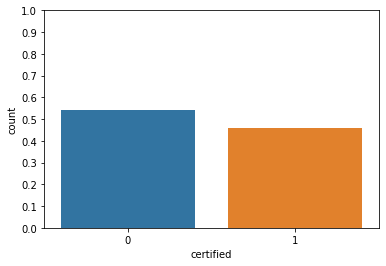

In [77]:
# bar chart
sb.countplot(data=df[df.explored == 1], x='certified')
n_records = df[df.explored == 1].shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.1f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names);

The certification rate of explored is about 46%. 

### certification rate by country

In [78]:
# certification rate by country
certification_rate_country = 100*(df[df.certified==1].groupby('country').size()) / df.groupby('country').size()

certification_rate_country.sort_values(ascending=False).round(2)

country
Spain                                     9.97
Poland                                    9.34
Greece                                    7.41
Germany                                   7.16
Portugal                                  7.00
Russian Federation                        6.80
Ukraine                                   6.34
France                                    5.71
Other Europe                              5.50
Colombia                                  4.98
Other North & Central Amer., Caribbean    4.72
United Kingdom                            4.40
India                                     4.38
Other South Asia                          4.15
Indonesia                                 3.83
Australia                                 3.82
Other South America                       3.50
Canada                                    3.27
Other Africa                              3.23
Mexico                                    3.18
Brazil                                    2.94
Unite

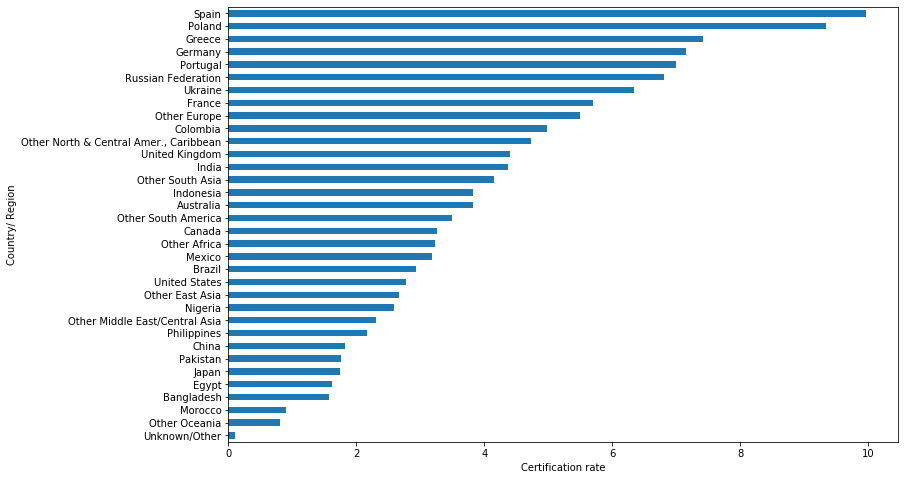

In [79]:
# bar chart
certification_rate_country.sort_values(ascending=True).plot(figsize = (12,8), kind='barh')
plt.xlabel('Certification rate')
plt.ylabel('Country/ Region');

In [80]:
# statistical description
certification_rate_country.describe()

count    34.000000
mean      3.953628
std       2.407034
min       0.107577
25%       2.199171
50%       3.383504
75%       5.367965
max       9.968750
dtype: float64

In [81]:
# chi square test

chisquare(certification_rate_country)

Power_divergenceResult(statistic=48.359580693164446, pvalue=0.04117374276354844)

The certification rate by country/region varies from 0.11% to 9.97%, with a mean of 3.95% and a medium of 3.38%. The countries with relatively high certification rate are all from Europe. 

### certification rate by level of education

In [82]:
# certification rate by level of education
certification_rate_edu = 100*(df[df.certified==1].groupby('education').certified.count()) / df.groupby('education').certified.count()

certification_rate_edu.sort_values(ascending=False)

education
Master's               4.646382
Doctorate              4.028805
Less than Secondary    3.971547
Secondary              3.040998
Bachelor's             2.911533
Name: certified, dtype: float64

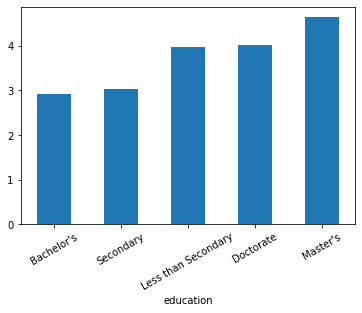

In [83]:
# bar chart
certification_rate_edu.sort_values(ascending=True).plot(kind='bar')
plt.xticks(rotation=30);

In [84]:
# chi square test 
chisquare(certification_rate_edu)

Power_divergenceResult(statistic=0.5730015339722522, pvalue=0.9660160615290182)

Master's has the highest certification rate. While Bachelor's has the lowest certification rate.

### certification VS age

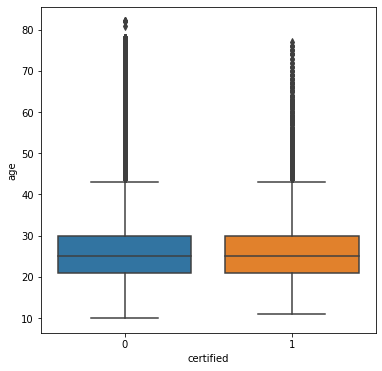

In [85]:
# boxplot
plt.figure(figsize=(6, 6))
sb.boxplot(data=df, x='certified', y='age');

In [86]:
# two samples t test

ttest_ind(df[df.certified==1].age, df[df.certified==0].age)

Ttest_indResult(statistic=-3.268437640018922, pvalue=0.0010815206326020017)

Although the box plot shows no significant difference between age in certified and uncertified. The t test result shows that there is sufficient evidence that the average age of certified is different from uncertified.

### certification rate by gender

In [87]:
# certification rate by gender
certification_rate_gender = 100*(df[df.certified==1].groupby('gender').certified.count()) / df.groupby('gender').certified.count()

certification_rate_gender.sort_values(ascending=False)

gender
f    3.942965
m    3.203412
Name: certified, dtype: float64

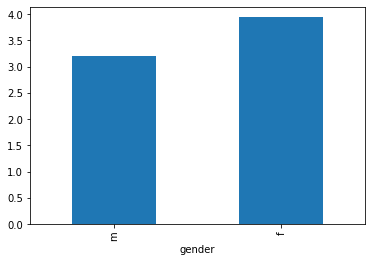

In [88]:
# bar chart
certification_rate_gender.sort_values(ascending=True).plot(kind='bar')

The certification rate of female is almost 4% while of male is juts a little more than 3%.

In [89]:
# value counts
df[df.certified==1].gender.value_counts()

m    9561
f    4112
Name: gender, dtype: int64

In [90]:
# shape
df[df.certified==1].shape

(13673, 29)

In [91]:
# z test

binom_test(x=9561, n=13673, p=0.5, alternative='greater')

0.0

The p value is very small, there is sufficient evidence that there is more male than female were certified.

### certification VS grade

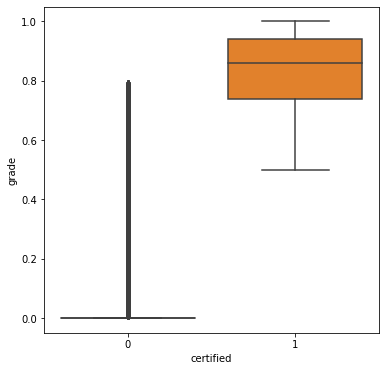

In [92]:
# boxplot
plt.figure(figsize=(6, 6))
sb.boxplot(data=df, x='certified', y='grade');

The average grade of the certified is more than 0.8. The average grade of uncertified is about 0.

### certification VS time_registered

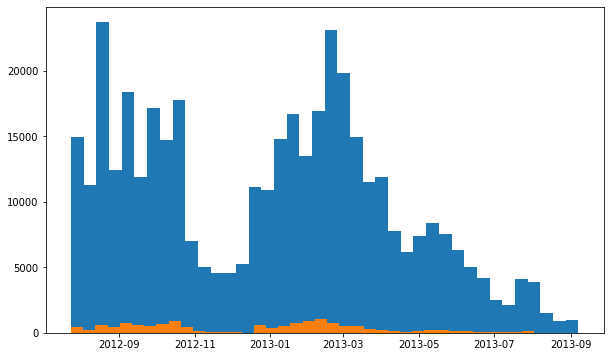

In [93]:
# histogram
plt.figure(figsize=(10, 6))

plt.hist(data=df, x='time_registered', bins=40)
plt.hist(data=df[df.certified == 1], x='time_registered', bins=40);



The distribution of certified is similar to the distribution of overall enrolment.

### certification VS last event time

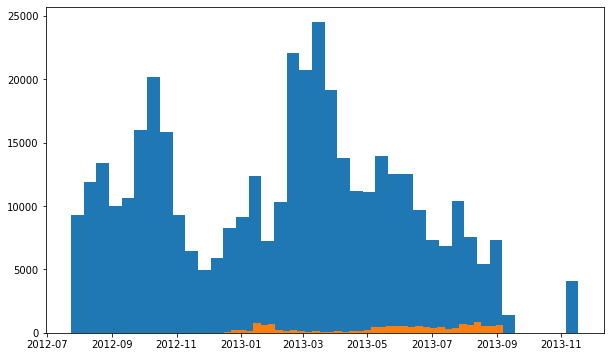

In [94]:
plt.figure(figsize=(10, 6))

plt.hist(data=df, x='last_event', bins=40)
plt.hist(data=df[df.certified == 1], x='last_event', bins=40);

### certification VS activities

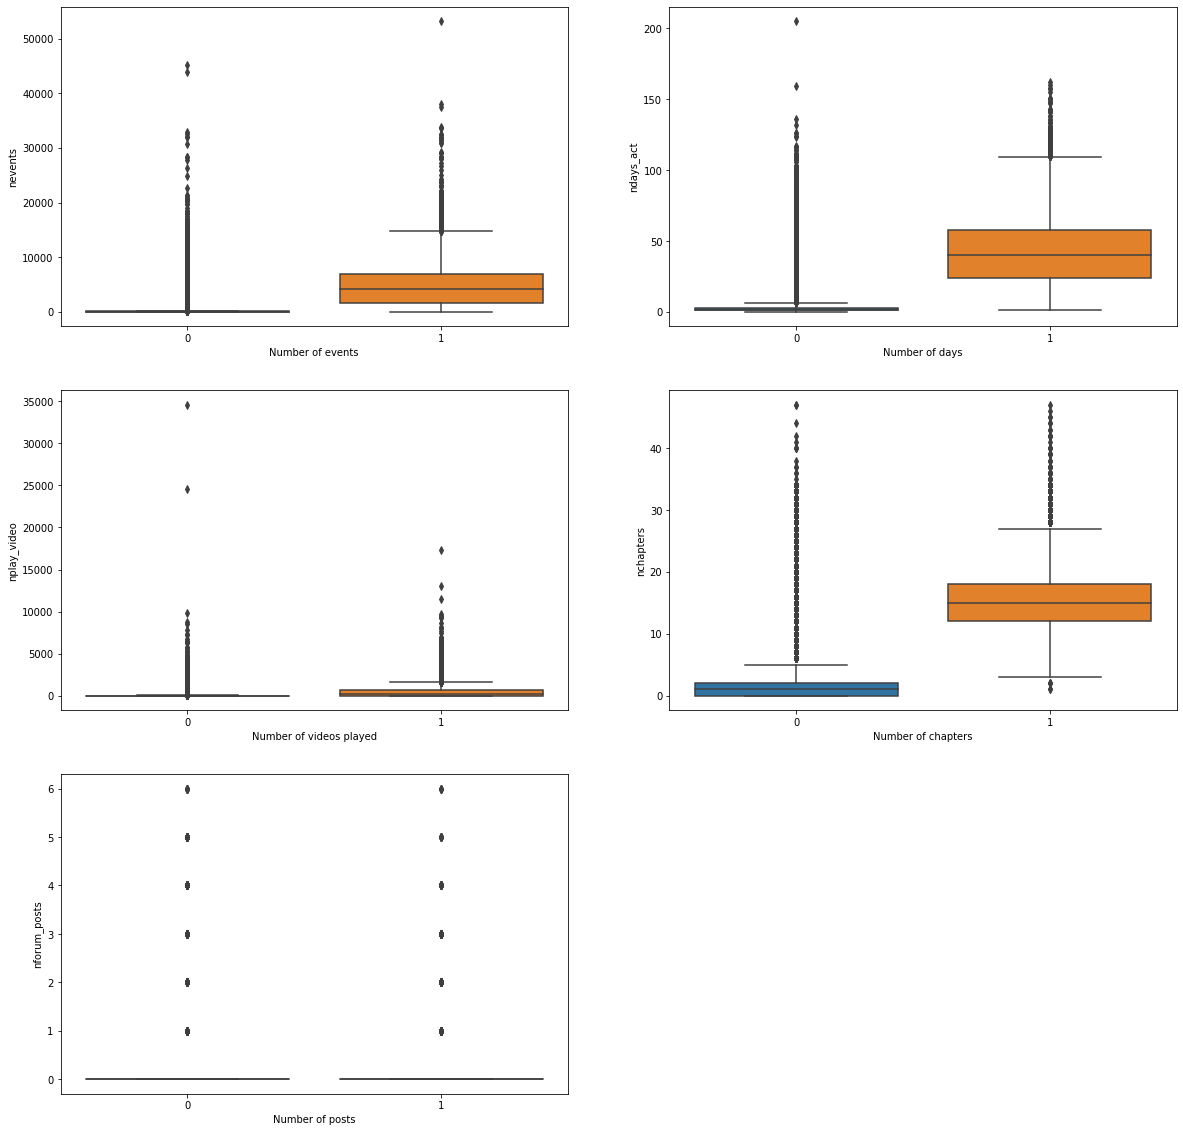

In [95]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sb.boxplot(data=df, x='certified', y='nevents')
plt.xlabel('Number of events')

plt.subplot(3, 2, 2)
sb.boxplot(data=df, x='certified', y='ndays_act')
plt.xlabel('Number of days')

plt.subplot(3, 2, 3)
sb.boxplot(data=df, x='certified', y='nplay_video')
plt.xlabel('Number of videos played')

plt.subplot(3, 2, 4)
sb.boxplot(data=df, x='certified', y='nchapters')
plt.xlabel('Number of chapters')

plt.subplot(3, 2, 5)
sb.boxplot(data=df, x='certified', y='nforum_posts')
plt.xlabel('Number of posts');

Those certified have more events, more active days , more videos played and more chapters viewed.

The number of posts are pretty small for both certified and uncertified,it is hard to interprete a significant difference. 

### certification rate by instituion

In [96]:
certification_rate_ins = 100*(df[df.certified==1].groupby('institution').certified.count()) / df.groupby('institution').certified.count()

certification_rate_ins.sort_values(ascending=False)

institution
MITx        3.989370
HarvardX    2.811824
Name: certified, dtype: float64

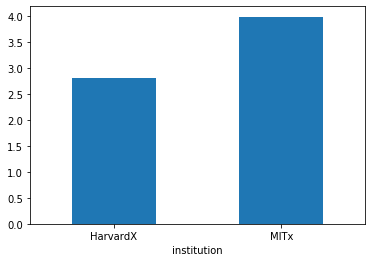

In [97]:
certification_rate_ins.sort_values(ascending=True).plot(kind='bar')
plt.xticks(rotation = 0);

Certification rate of those who took HarvardX courses is less than 3%. The number is about 4% for those who took MITx courses.

### certification rate by course name

In [98]:
certification_rate_course_code = 100*(df[df.certified==1].groupby('course_code').certified.count()) / df.groupby('course_code').certified.count()

certification_rate_course_code.sort_values(ascending=False)

course_code
14.73x    9.035509
PH207x    5.359186
ER22x     4.865988
6.002x    4.575695
2.01x     4.332802
3.091x    4.162943
7.00x     3.772660
8.MReV    3.326336
6.00x     2.875453
8.02x     2.555871
PH278x    2.408951
CB22x     1.616314
CS50x     1.258264
Name: certified, dtype: float64

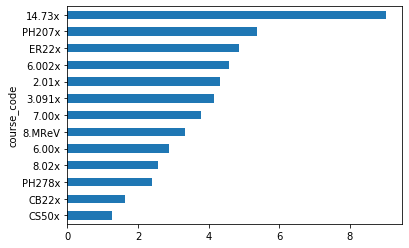

In [99]:
certification_rate_course_code.sort_values(ascending=True).plot(kind='barh')
plt.xticks(rotation = 0);

In [100]:
certification_rate_course_code.describe()

count    13.000000
mean      3.857382
std       1.994662
min       1.258264
25%       2.555871
50%       3.772660
75%       4.575695
max       9.035509
Name: certified, dtype: float64

### cetification rate by semester

In [101]:
certification_rate_semester = 100*(df[df.certified==1].groupby('semester').certified.count()) / df.groupby('semester').certified.count()

certification_rate_semester.sort_values(ascending=False)

semester
2013_Spring    3.852396
2013_Summer    3.326336
2012_Fall      2.961205
Name: certified, dtype: float64

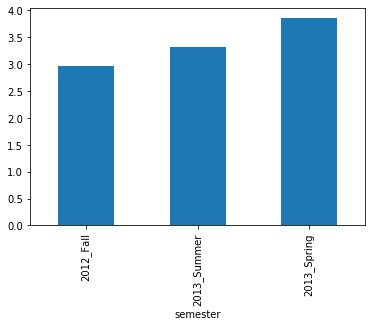

In [102]:
certification_rate_semester.sort_values(ascending=True).plot(kind='bar')

Later semester tends to have a higher certification rate.

### certification VS course duration

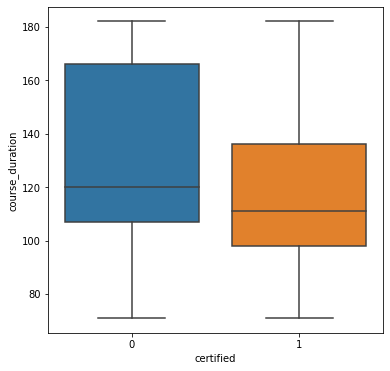

In [103]:
plt.figure(figsize=(6, 6))
sb.boxplot(data=df, x='certified', y='course_duration');

The medium course duration of certified is less than uncertified.

### certification rate VS registered_launch_delta

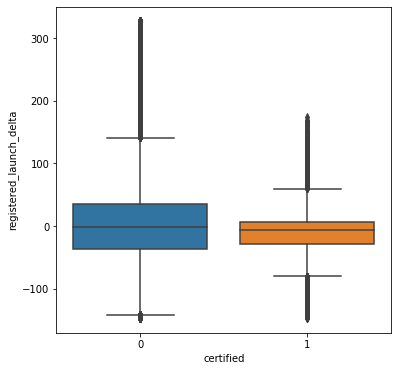

In [104]:
plt.figure(figsize=(6, 6))
sb.boxplot(data=df, x='certified', y='registered_launch_delta');

The average days of registered after course launch is close for certified and uncertified.

### certification VS lifetime proportion

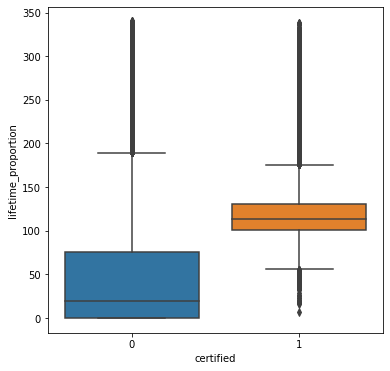

In [105]:
plt.figure(figsize=(6, 6))
sb.boxplot(data=df, x='certified', y='lifetime_proportion');

### grade VS course_id

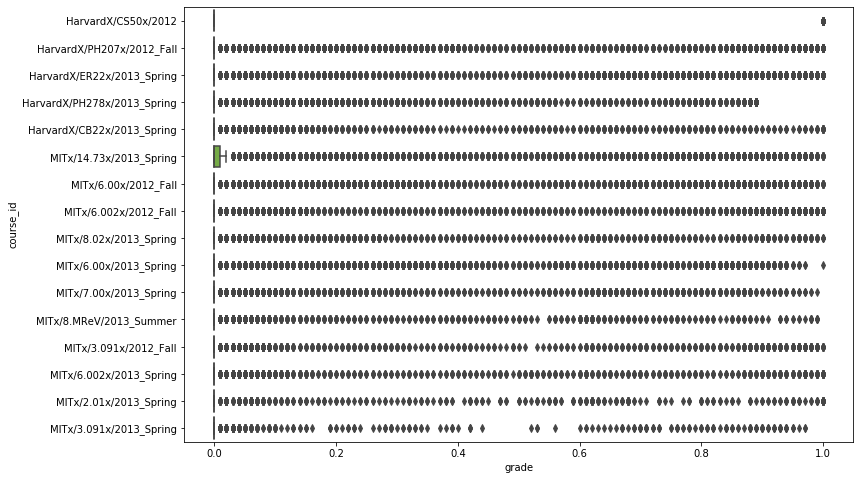

In [106]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df, y='course_id', x='grade', orient='h');

Most of the courses have a grade near 0. The course 'MITx/14.73x/2013_Spring' has a higher grade.

### grade VS viewed

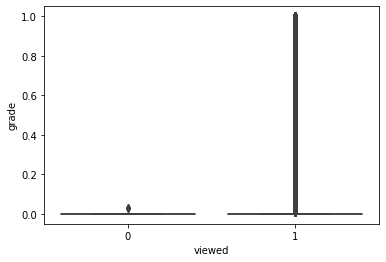

In [107]:
sb.boxplot(data=df, x='viewed', y='grade');

### grade VS explored

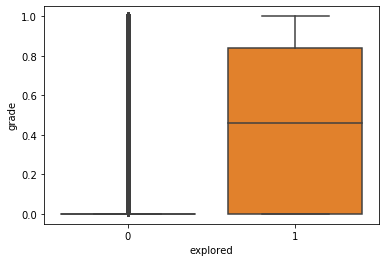

In [108]:
sb.boxplot(data=df, x='explored', y='grade');

For those explored, the median is grade is about 0.5

### grade VS country

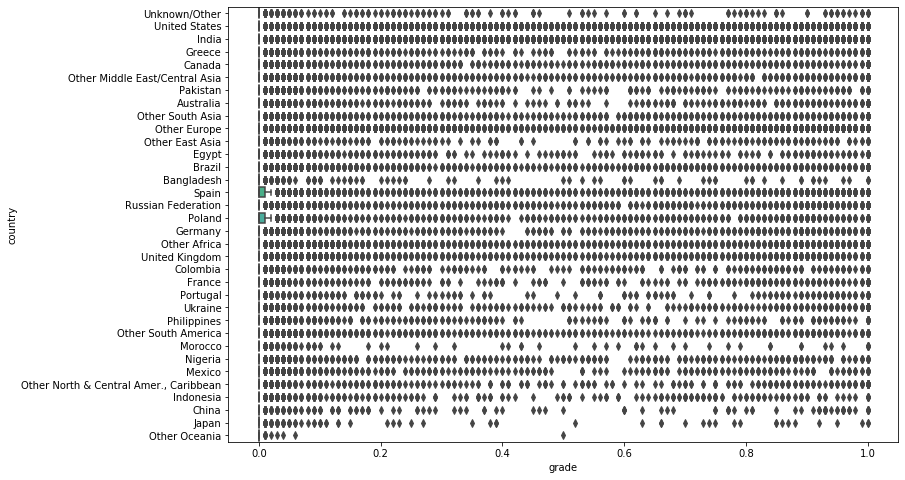

In [109]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df, y='country', x='grade', orient='h');

Spain and Poland have a higher grade. The other countries have a grade around 0.

### grade VS education

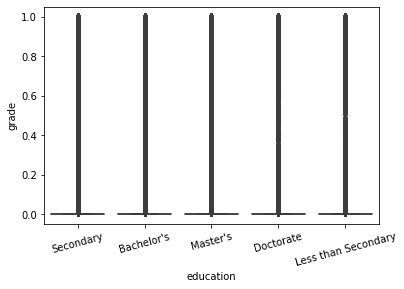

In [110]:
sb.boxplot(data=df, x='education', y='grade')
plt.xticks(rotation=15);

### grade VS age

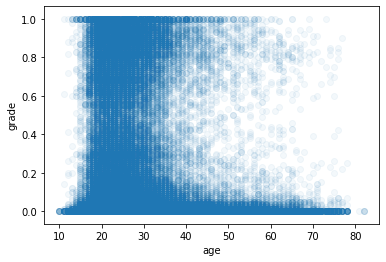

In [111]:
# scatter plot of grade VS age

plt.scatter(data=df, x='age', y='grade',alpha=0.05)
plt.xlabel('age')
plt.ylabel('grade');

It is not a very strong correlation, but we cam still see that as age increase, the likelihood of getting a higher grade drops. students of age 20-30 are more likely to get a higher grade, while it is less likely for older age.

### grade VS gender

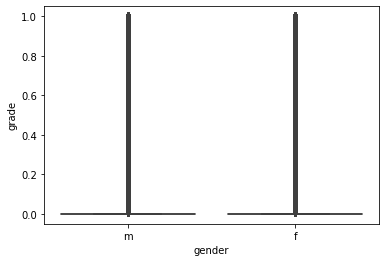

In [112]:
sb.boxplot(data=df, x='gender', y='grade');

### grade VS activities

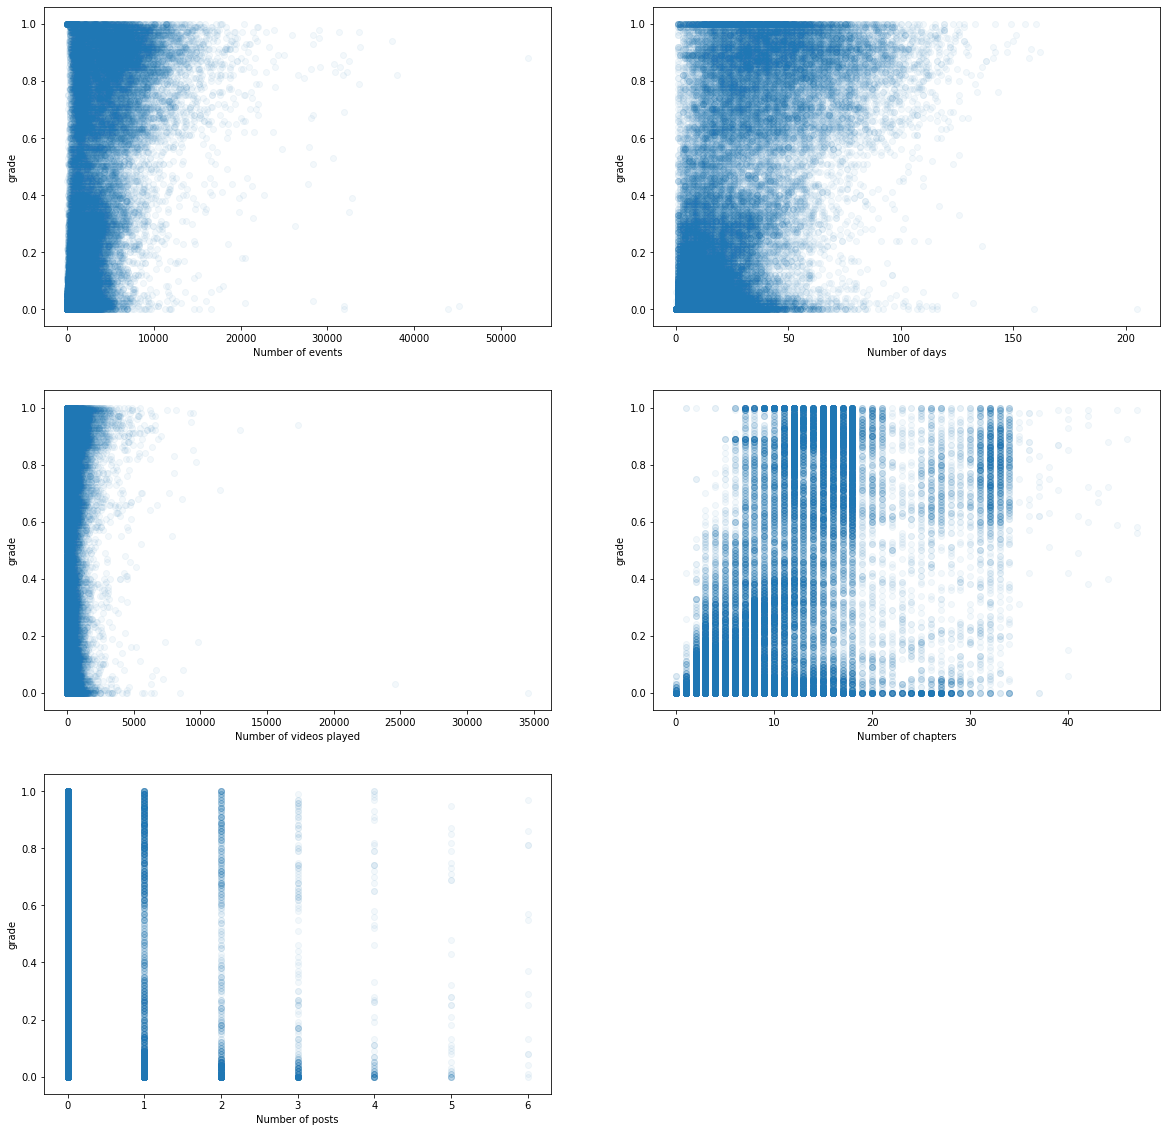

In [113]:
# scatter plot of grade VS activities
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.scatter(data=df, x='nevents', y='grade', alpha=0.05)
plt.ylabel('grade')
plt.xlabel('Number of events')

plt.subplot(3, 2, 2)
plt.scatter(data=df, x='ndays_act', y='grade', alpha=0.05)
plt.ylabel('grade')
plt.xlabel('Number of days')

plt.subplot(3, 2, 3)
plt.scatter(data=df, x='nplay_video', y='grade', alpha=0.05)
plt.ylabel('grade')
plt.xlabel('Number of videos played')

plt.subplot(3, 2, 4)
plt.scatter(data=df, x='nchapters', y='grade', alpha=0.05)
plt.ylabel('grade')
plt.xlabel('Number of chapters')

plt.subplot(3, 2, 5)
plt.scatter(data=df, x='nforum_posts', y='grade', alpha=0.05)
plt.ylabel('grade')
plt.xlabel('Number of posts');

The more events, active days, chapters, the higher the grade

### grade VS institution

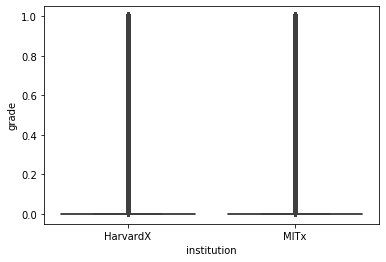

In [114]:
sb.boxplot(data=df, x='institution', y='grade');

### grade VS course name

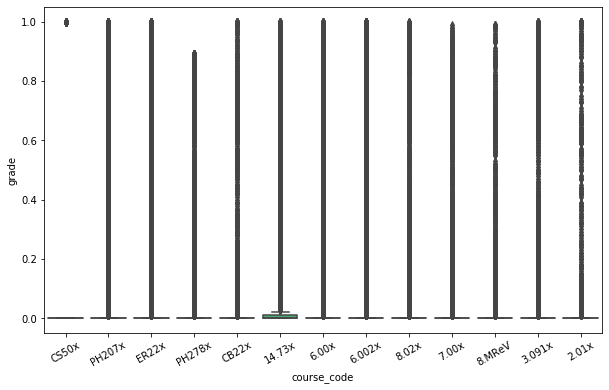

In [115]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x='course_code', y='grade')
plt.xticks(rotation=30);

### grade VS semester

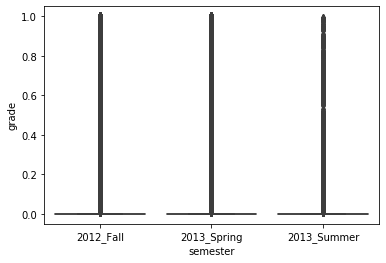

In [116]:
sb.boxplot(data=df, x='semester', y='grade');

### grade VS course launch date

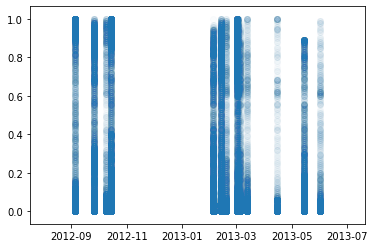

In [117]:
plt.scatter(data=df, x='course_launch', y='grade', alpha=0.02);

### grade VS course wrap date

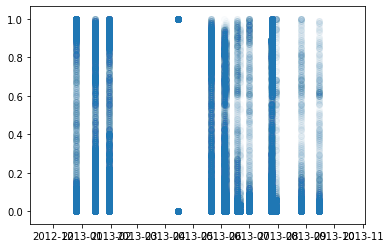

In [118]:
plt.scatter(data=df, x='course_wrap', y='grade', alpha=0.02);

### grade VS course duration

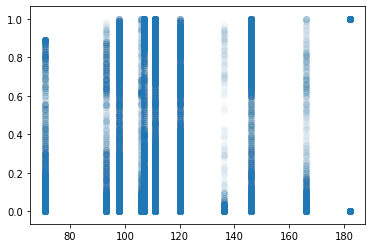

In [119]:
plt.scatter(data=df, x='course_duration', y='grade', alpha=0.02);

### grade VS enrol registered_launch_delta

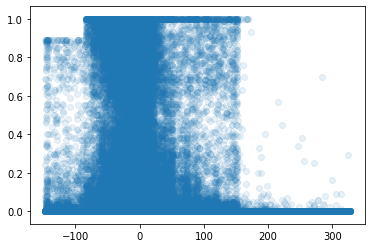

In [120]:
plt.scatter(data=df, x='registered_launch_delta', y ='grade', alpha=0.1);

### grade VS lifetime proportion

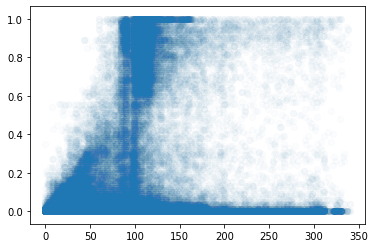

In [121]:
plt.scatter(data=df, x='lifetime_proportion', y='grade', alpha=0.02);

The higher grades appear around lifetime proportiono of 100%. Although there are some outliers that the proportion is more than 100%. Their grades are not higher than grades of proportion around 100%.

### Discussion

- For the 16 courses, the certification rate ranges from 1.25% to 9.04%, with a mean of 3.80% and a median of 3.55%.
- The certification rate of viewed is about 6%. This is higher than the overall certification rate, but it is still very low.
- The certification rate of explored is about 45%.
- The certification rate by country/region varies from 0.11% to 9.97%, with a mean of 3.95% and a medium of 3.38%. The countries with relatively high certification rate are all from Europe.
- Master's has the highest certification rate. While Bachelor's has the lowest certification rate.
- There is no significant difference between age in certified and uncertified.
- The certification rate of female is almost 4% while of male is juts a little more than 3%.
- The average grade of the certified is more than 0.8. The average grade of uncertified is about 0.
- Those certified have more events, more active days , more videos played and more chapters viewed.The number of posts are pretty small for both certified and uncertified,it is hard to interprete a significant difference.
- Certification rate of those who took HarvardX courses is less than 3%. The number is about 4% for those who took MITx courses.
- Later semester tends to have a higher certification rate.
- The median course duration of certified is less than uncertified.
- The completion rate of those who enroled before course launch is around 4%, a little bigger than the certification rate of those who enrol after the course launch, which is about 3%.
- Most of the courses have a grade near 0. The course 'MITx/14.73x/2013_Spring' has a higher grade
- For those explored, the median is grade is about 0.5
- It is not a very strong correlation, but we cam still see that as age increase, the likelihood of getting a higher grade drops. students of age 20-30 are more likely to get a higher grade, while it is less likely for older age.
- The more events, active days, chapters, the higher the grade. Number of videos and posts  does not significantly impact thee grade.
- The higher grades appear around lifetime proportiono of 100%. Although there are some outliers that the proportion is more than 100%. Their grades are not higher than grades of proportion around 100%.

## Multivariate EDA


In this part we do exploratory analysis on multiple variables.

### course_id VS viewed VS certified

In [122]:
# subset of viewed
df_viewed = df[df.viewed == 1]

# certification rate by course
certification_rate_course_viewed = 100*(df_viewed[df_viewed.certified==1].groupby('course_id').certified.count()) / df_viewed.groupby('course_id').certified.count()
certification_rate_course_viewed


course_id
HarvardX/CB22x/2013_Spring      2.923231
HarvardX/CS50x/2012             3.077726
HarvardX/ER22x/2013_Spring      8.368414
HarvardX/PH207x/2012_Fall       8.996522
HarvardX/PH278x/2013_Spring     6.093570
MITx/14.73x/2013_Spring        14.278132
MITx/2.01x/2013_Spring          6.252397
MITx/3.091x/2012_Fall           8.941966
MITx/3.091x/2013_Spring         3.196622
MITx/6.002x/2012_Fall           7.793604
MITx/6.002x/2013_Spring         7.547776
MITx/6.00x/2012_Fall            4.966908
MITx/6.00x/2013_Spring          2.612379
MITx/7.00x/2013_Spring          5.620438
MITx/8.02x/2013_Spring          3.360935
MITx/8.MReV/2013_Summer         4.372745
Name: certified, dtype: float64

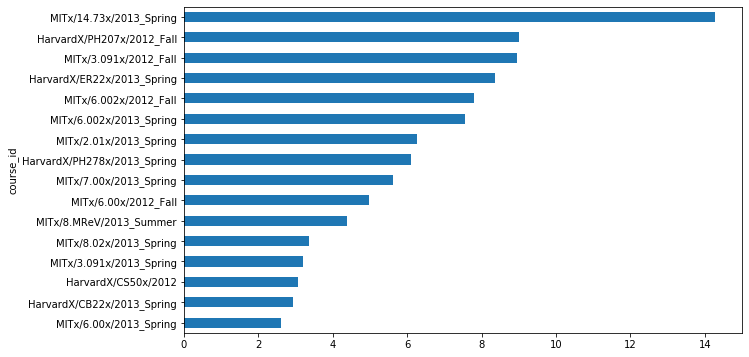

In [123]:
certification_rate_course_viewed.sort_values(ascending=True).plot(figsize=(10, 6), kind='barh');

In [124]:
certification_rate_course_viewed.describe()

count    16.000000
mean      6.150210
std       3.111916
min       2.612379
25%       3.319857
50%       5.857004
75%       7.937306
max      14.278132
Name: certified, dtype: float64

The certification rate of viewed varies from 2.61% to 14.28%, with a mean of 6.15% and median of 5.86%

### course_id VS explored VS certified

In [125]:
# subset of explored
df_explored = df[df.explored == 1]


# certification rate by course
certification_rate_course_explored = 100*(df_explored[df_explored.certified==1].groupby('course_id').certified.count()) / df_explored.groupby('course_id').certified.count()
certification_rate_course_explored

course_id
HarvardX/CB22x/2013_Spring     74.186047
HarvardX/CS50x/2012            14.593401
HarvardX/ER22x/2013_Spring     56.180580
HarvardX/PH207x/2012_Fall      45.236231
HarvardX/PH278x/2013_Spring    58.720330
MITx/14.73x/2013_Spring        72.488408
MITx/2.01x/2013_Spring         42.519685
MITx/3.091x/2012_Fall          72.019078
MITx/3.091x/2013_Spring        80.000000
MITx/6.002x/2012_Fall          61.974110
MITx/6.002x/2013_Spring        71.315372
MITx/6.00x/2012_Fall           55.911330
MITx/6.00x/2013_Spring         47.233202
MITx/7.00x/2013_Spring         50.096154
MITx/8.02x/2013_Spring         42.115972
MITx/8.MReV/2013_Summer        70.800000
Name: certified, dtype: float64

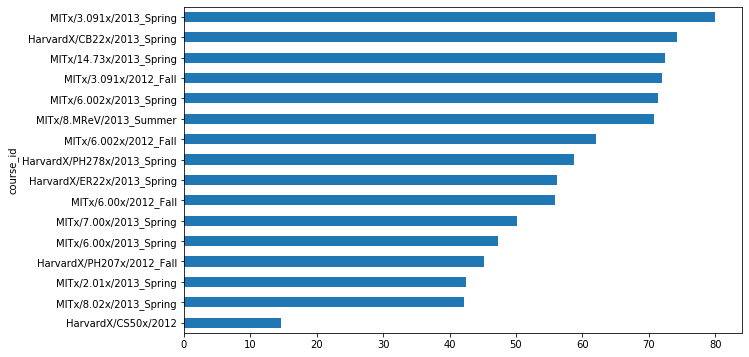

In [126]:
certification_rate_course_explored.sort_values(ascending=True).plot(figsize=(10, 6), kind='barh');

In [127]:
certification_rate_course_explored.describe()

count    16.000000
mean     57.211869
std      16.782941
min      14.593401
25%      46.733959
50%      57.450455
75%      71.491299
max      80.000000
Name: certified, dtype: float64

The certification rate of explored varies from 14.59% to 80.00%, with a mean of 57.21% and median of 57.45%

### grade VS education VS certified

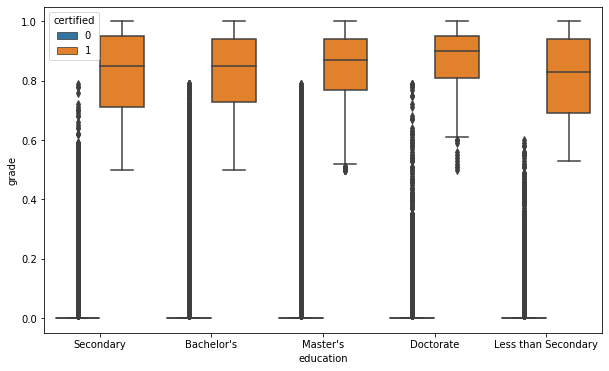

In [128]:
# grade VS Education VS certified
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x='education', y='grade', hue='certified');

Median grades for uncertified is about 0. For certified are above 0.8. Doctorate has the highest median grade.

### age VS education level VS certified

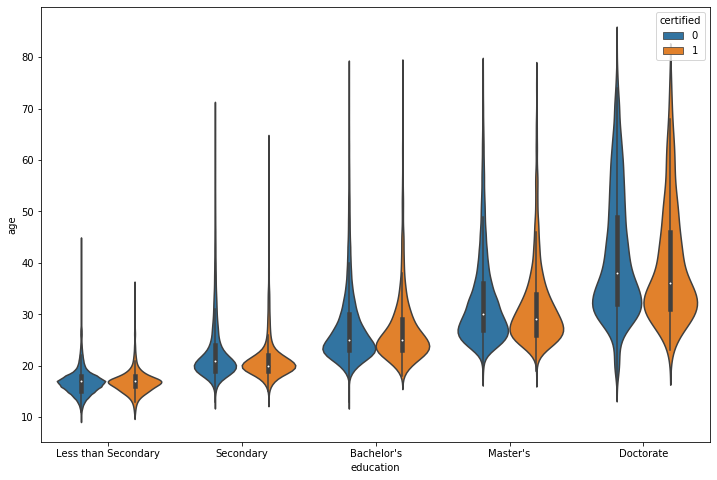

In [129]:
# Violin plot of age distribution by certified, by education level
plt.figure(figsize=(12, 8))
order = ['Less than Secondary','Secondary', "Bachelor's", "Master's", 'Doctorate']
sb.violinplot(data=df, x='education', y='age', hue='certified', order=order);

For those who have a Master's or Doctorate Degree, the median age of the certified is less than uncertified. 

### gender VS lifetime_proportion VS certified

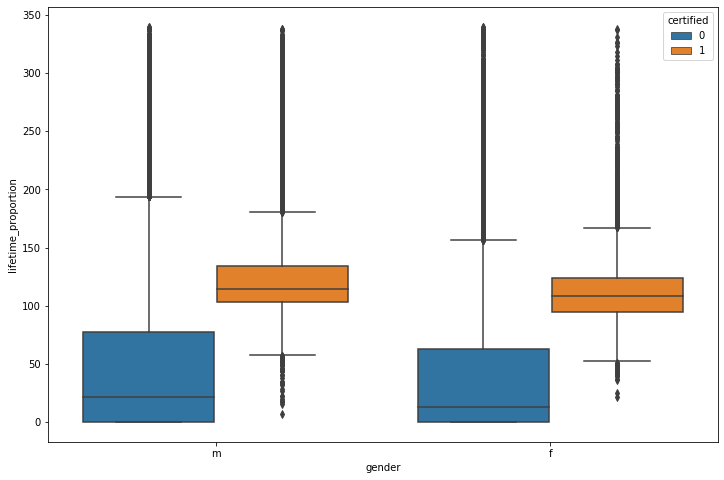

In [130]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df, x='gender', y='lifetime_proportion', hue='certified');

Certified has a larger lifetime_proportion than uncertified, however there is no significant difference observed across gender.

### lifetime_proportion VS grade VS level of education

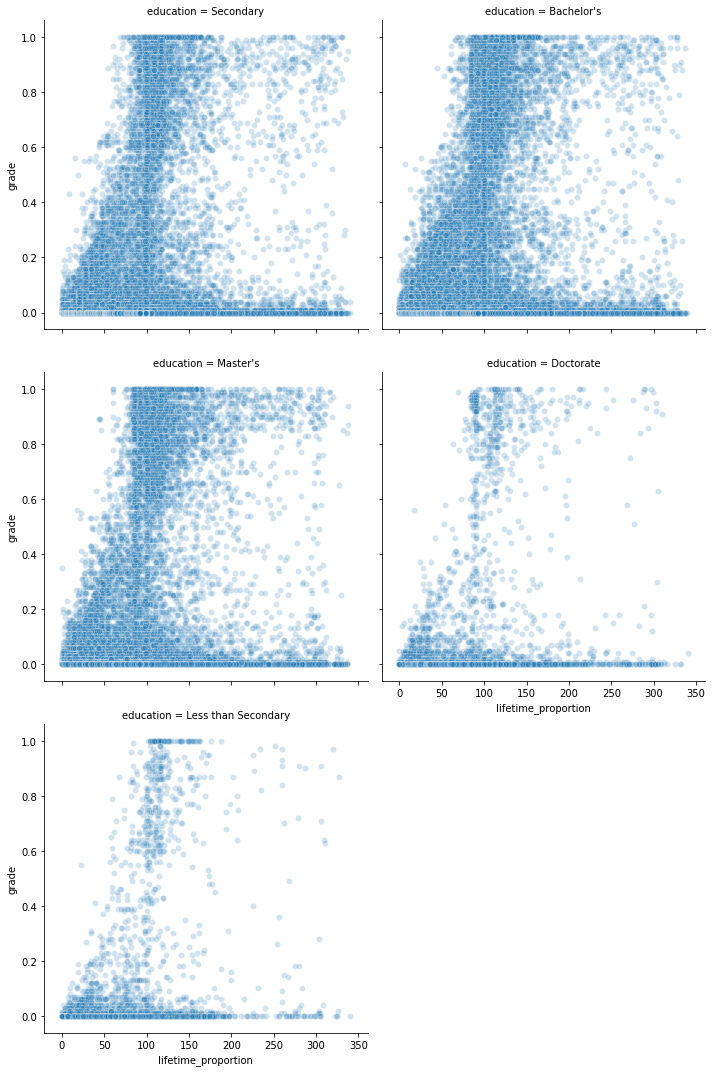

In [131]:
sb.relplot(data=df, x='lifetime_proportion', y='grade', alpha= 0.2, col='education', col_wrap=2);

The larger the lifetime proportion, the higher the grade. This applies to all the levels of education.

### user_id VS certified VS semester

For those who had completed one course, are they more likely to complete a subsequent course? 

We will first select the users who completed at least one course in the 2012_Fall semester. Then we will look at the certification rate of those who registered in the 2013_Spring semester among those who completed a course in the 2012_Fall semester. We will also look at the overall certification rate of 2013_Spring semester for comparation.

In [132]:
# learners who completed at least one course in the 2012_Fall semester.
user_list = df[(df.semester == '2012_Fall') & (df.certified == 1)].user_id.unique()
user_list

array(['MHxPC130320562', 'MHxPC130574671', 'MHxPC130158860', ...,
       'MHxPC130579710', 'MHxPC130330256', 'MHxPC130358119'], dtype=object)

In [133]:
# 2013 Spring semester certification rate for learners who completed at least one course in the 2012_Fall semester.
df_2013_spring = df[df.semester == '2013_Spring']
df_2013_spring[df_2013_spring.user_id.isin(user_list)].certified.value_counts()


0    1372
1     286
Name: certified, dtype: int64

In [134]:
certification_rate1 = df_2013_spring[df_2013_spring.user_id.isin(user_list)].certified.value_counts()[1]/df_2013_spring[df_2013_spring.user_id.isin(user_list)].shape[0]
print('The 2013 Spring semester certification rate for learners who completed at least one course in the 2012_Fall semester is {:.2%}'.format(certification_rate1))



The 2013 Spring semester certification rate for learners who completed at least one course in the 2012_Fall semester is 17.25%


In [135]:
df_2013_spring.certified.value_counts()

0    186011
1      7453
Name: certified, dtype: int64

In [136]:
# 2013 Spring semester certification rate for all the learners
certification_rate2 = df_2013_spring[df_2013_spring.certified == 1].shape[0] / df_2013_spring.shape[0]
print('2013 Spring semester certification rate for all the learners is {:.2%}'.format(certification_rate2))

2013 Spring semester certification rate for all the learners is 3.85%


In [137]:
# chi square test
chisquare([286, 311], f_exp=[7445, 19545])

Power_divergenceResult(statistic=25811.93533384841, pvalue=0.0)

The p value is 0, there is sufficient evidence that these two certificatio rates are different. 

Those who had completed one course, are more likely to complete a subsequent course

### Discission

- The certification rate of viewed varies from 2.61% to 14.28%, with a mean of 6.15% and median of 5.86%
- The certification rate of explored varies from 14.59% to 80.00%, with a mean of 57.21% and median of 57.45%
- Median grades for uncertified is about 0. For certified are above 0.8. Doctorate has the highest median grade.
- For those who have a Master's or Doctorate Degree, the median age of the certified is less than uncertified.
- Certified has a larger lifetime_proportion than uncertified, however there is no significant difference observed across gender.
- The larger the lifetime proportion, the higher the grade. This applies to all the levels of education.
- Those who had completed one course, are more likely to complete a subsequent course.

## Save Dataset

In [138]:
# drop grade_sqrt, grade_cbrt columns
df = df.drop(['grade_sqrt', 'grade_cbrt'], axis=1)

In [139]:
# we will save the dataset as a csv file
df.to_csv('data/hmx_eda.csv', index=False)

## Reference

- [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- [How to print a percentage value in python?](https://stackoverflow.com/questions/5306756/how-to-print-a-percentage-value-in-python)

- [pandas - add new column to dataframe from dictionary [duplicate]](https://stackoverflow.com/questions/29794959/pandas-add-new-column-to-dataframe-from-dictionary)
- [Python | Convert two lists into a dictionary](https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/)
